# Stupid Learner Notebook

### Introduction

In the following notebook we will analyze the behaviour of a particular learner type called *Stupid Learner*.

The name derives from the fact that it doesn't actually learn anything during each iteration of the simulation but it always subdivides the current total budget equally among the various products instead.

### Walkthrough

Since the learner doesn't change over time and its decision algorithm is quite easy we are going to vary the environmental conditions and observe how the "*constant prediction algorithm*" scores in different situations.

In [164]:
from ola2022_project.environment.environment import example_environment
from ola2022_project.simulation.simulation import simulation 
from ola2022_project.learners.stupid_learner import StupidLearner # TODO: Fix import strategy

import numpy as np
import matplotlib.pyplot as plt

In [165]:
# Function used for quickly plotting an experiment onto a graph and showing it
def plot_experiment(n_days, rewards_per_experiment):
    # Calculating and shaping data that is going to be shown on the graph
    rewards = np.array(rewards_per_experiment).reshape(n_days)
    days = np.arange(1, n_days + 1, 1)
    mean = [np.mean(rewards_per_experiment)] * n_days
    # Creating a new figure and plotting the data onto it
    plt.figure()
    plt.plot(days, rewards, label = "Experiment", marker = ".", linestyle = '-')
    plt.plot(days, mean, label = 'Mean', linestyle = '--')
    # Setting labels and showing the figure
    plt.xlabel("days")
    plt.ylabel("reward")
    plt.legend(loc = "upper right")
    plt.show()

In [166]:
# Random Number Generator used as a source of randomness by the environment and the simulation
rng = np.random.default_rng()
# Arbitrary total budget and product prices
total_budget = 100
product_prices = [5, 25, 10, 15, 9]
# Environment containing all of the contextual information
env = example_environment(
    rng = rng, 
    total_budget = total_budget, 
    product_prices = product_prices
)
# Simulation parameters
n_experiments = 1
n_days = 100

experiment: 100%|████████████████████| 1/1 [00:00<00:00, 14.50it/s]


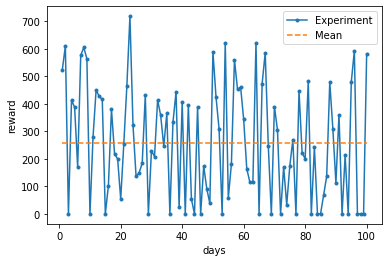

In [167]:
# Running the simulation
rewards_per_experiment = simulation(
    rng,
    env,
    learner_factory = StupidLearner,
    n_experiment = n_experiments,
    n_day = n_days,
)
# Plotting the experiment
plot_experiment(n_days, rewards_per_experiment)

### Results

As expected, the reward obtained by the learner fluctuates over time without any particular trend since we are making a constant prediction in a random environment.

The variance of the rewards is high and there is little to no correlation between them.

### Another scenario

What if we take into consideration an enviroment where there is a great imbalance in the products' prices?

Intuitively we would expect that the reward is lower since, each day, a fixed amount of the total budget gets "wasted" on the products with high prices that are way beyond the reservation prices of most customers.

This would be true for all learners but it is more evident for this particular type of learner since it doesn't try to adapt to the environment.

In [168]:
# Defining a new environment
new_product_prices = [5, 1, 80, 55, 8]
new_env = example_environment(
    rng = rng, 
    total_budget = total_budget, 
    product_prices = new_product_prices
)

experiment: 100%|████████████████████| 1/1 [00:00<00:00, 17.74it/s]


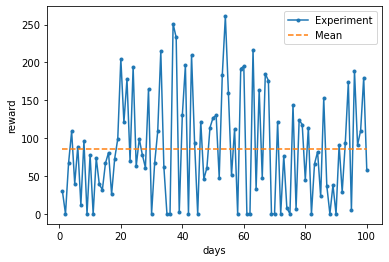

In [169]:
# Running the new simulation
new_rewards_per_experiment = simulation(
    rng,
    new_env,
    learner_factory = StupidLearner,
    n_experiment = n_experiments,
    n_day = n_days,
)
# Plotting the experiment
plot_experiment(n_days, new_rewards_per_experiment)

### Results 

We can see that the generated data supports our hypotesis and, in addition, we can even show that the increase in rewards generated by incrementing the total budget is smaller when the prices are imbalanced due to the reasons stated above.

In [170]:
n_budgets = 6
budget_interval = 25
inc_env = inc_new_env = np.array([])
inc_rewards_per_experiment = inc_new_rewards_per_experiment = np.empty((0, n_days))
# Creating the previous two environments with various total budgets
for i in range(0, n_budgets):
    inc_env = np.append(inc_env, example_environment(
        rng = rng, 
        total_budget = total_budget + (i * budget_interval), 
        product_prices = product_prices
    ))
    inc_new_env = np.append(inc_new_env, example_environment(
        rng = rng, 
        total_budget = total_budget + (i * budget_interval), 
        product_prices = new_product_prices
    ))
# Running their respective simulations
for i in range(0, n_budgets):
    inc_rewards_per_experiment = np.vstack([inc_rewards_per_experiment, simulation(
        rng,
        inc_env[i],
        learner_factory = StupidLearner,
        n_experiment = n_experiments,
        n_day = n_days,
    )])
    inc_new_rewards_per_experiment = np.vstack([inc_new_rewards_per_experiment, simulation(
        rng,
        inc_new_env[i],
        learner_factory = StupidLearner,
        n_experiment = n_experiments,
        n_day = n_days,
    )])

experiment: 100%|████████████████████| 1/1 [00:00<00:00, 10.02it/s]


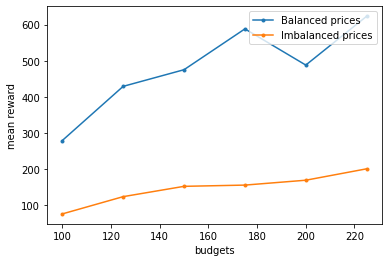

In [171]:
# Plotting the comparison between the two averages in both cases
budgets = [total_budget + i * budget_interval for i in range(0, n_budgets)]
means = [np.mean(inc_rewards_per_experiment[i]) for i in range(0, n_budgets)]
new_means = [np.mean(inc_new_rewards_per_experiment[i]) for i in range(0, n_budgets)]
plt.figure()
plt.plot(budgets, means, label = "Balanced prices", marker = ".", linestyle = '-')
plt.plot(budgets, new_means, label = "Imbalanced prices", marker = ".", linestyle = '-')
plt.xlabel("budgets")
plt.ylabel("mean reward")
plt.legend(loc = "upper right")
plt.show()